#**KNN - Classification (Scratch)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_diabetes, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, explained_variance_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Code**

In [2]:
class KNN:
  def __init__(self, n_neighbors=3, weights='uniform', metric='euclidean', p=2, normalize=False):
    self.n_neighbors = n_neighbors
    self.weights = weights
    self.metric = metric
    self.p = p  # For Minkowski distance
    self.normalize = normalize

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
    if self.normalize:
        self.scaler = StandardScaler()
        self.X_train = self.scaler.fit_transform(self.X_train)

  def predict(self, X):
    if self.normalize:
        X = self.scaler.transform(X)
    return np.array([self._predict(x) for x in X])

  def _predict(self, x):
    distances = self._compute_distances(x)
    k_indices = np.argsort(distances)[:self.n_neighbors]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    if self.weights == 'uniform':
        return np.bincount(k_nearest_labels).argmax()
    elif self.weights == 'distance':
        weights = 1 / (distances[k_indices] + 1e-5)  # Small value to prevent division by zero
        return np.bincount(k_nearest_labels, weights=weights).argmax()
    elif callable(self.weights):
        weights = self.weights(distances[k_indices])  # Custom weight function
        return np.bincount(k_nearest_labels, weights=weights).argmax()

  def _compute_distances(self, x):
    if self.metric == 'euclidean':
        return np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
    elif self.metric == 'manhattan':
        return np.sum(np.abs(self.X_train - x), axis=1)
    elif self.metric == 'minkowski':
        return np.sum(np.abs(self.X_train - x) ** self.p, axis=1) ** (1 / self.p)
    elif self.metric == 'cosine':
        return 1 - np.dot(self.X_train, x) / (np.linalg.norm(self.X_train, axis=1) * np.linalg.norm(x))
    else:
        raise ValueError(f"Unsupported metric: {self.metric}")

**Load Dataset**

In [3]:
# Load Iris dataset and split
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for 2D visualization
y = iris.target

In [4]:
print(X.shape), print(y.shape)
print(X[:5])
print(y[:5])

(150, 2)
(150,)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[0 0 0 0 0]


In [5]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

**Train**

In [6]:
# Initialize and train the enhanced KNN classifier
knn = KNN(n_neighbors=5, weights='distance', metric='minkowski', p=3, normalize=True)
knn.fit(X_train, y_train)

**Evaluation**

In [7]:
# Predict and evaluate
y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7777777777777778
[[19  0  0]
 [ 0  8  5]
 [ 0  5  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.62      0.62      0.62        13
           2       0.62      0.62      0.62        13

    accuracy                           0.78        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.78      0.78        45



**Visualization**

<ipython-input-8-b030cff87d53>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', cmap='viridis', label=iris.target_names[0])
<ipython-input-8-b030cff87d53>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g', cmap='viridis', label=iris.target_names[1])
<ipython-input-8-b030cff87d53>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter3 = ax.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='r', cmap='viridis', label=iris.target_names[2])
<ipython-input-8-b030cff87d53>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter4 = ax.scatter(X_test[:, 0], X_test[:, 1], c='k', cmap='viridis', marker='x', label='Predicted Label')


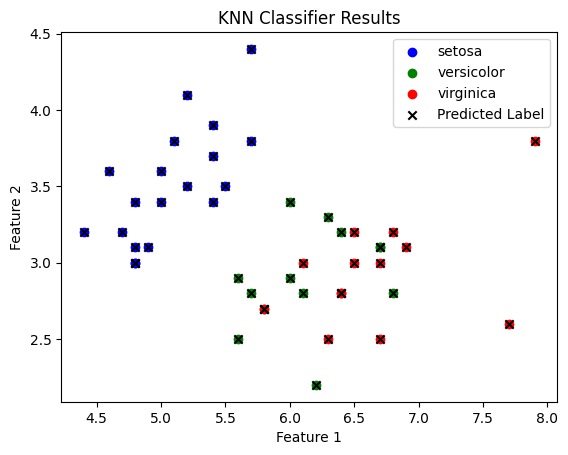

In [8]:
# Create scatter plots of the test data with colored points representing the true and predicted labels
fig, ax = plt.subplots()
scatter1 = ax.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='b', cmap='viridis', label=iris.target_names[0])
scatter2 = ax.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='g', cmap='viridis', label=iris.target_names[1])
scatter3 = ax.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='r', cmap='viridis', label=iris.target_names[2])
scatter4 = ax.scatter(X_test[:, 0], X_test[:, 1], c='k', cmap='viridis', marker='x', label='Predicted Label')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('KNN Classifier Results')
handles = [scatter1, scatter2, scatter3, scatter4]
labels = [h.get_label() for h in handles]
ax.legend(handles=handles, labels=labels)
plt.show()

In [9]:
def visualize_knn_decision_boundary(knn, X, y):
    """Visualize decision boundaries for the KNN classifier (works for 2D feature data)."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title('KNN Decision Boundary for Train Set')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

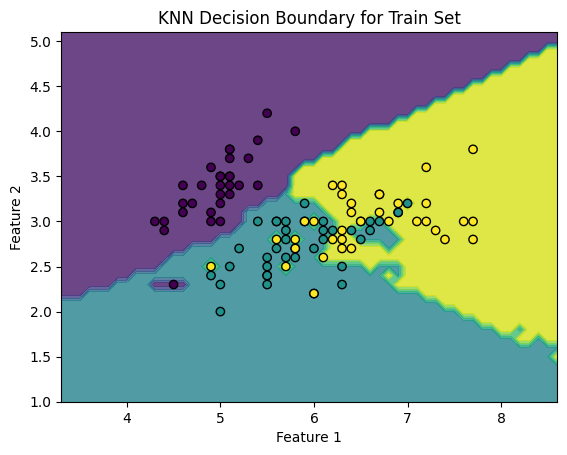

In [10]:
# Visualization of decision boundaries
visualize_knn_decision_boundary(knn, X_train, y_train)

In [11]:
def visualize_knn_test_boundary(knn, X_train, y_train, X_test, y_test):
    """Visualize decision boundaries for the KNN classifier specifically for the test set (works for 2D feature data)."""
    # Set up the grid for plotting
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict using the trained KNN model
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Scatter plot for the training set
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label='Training set')

    # Scatter plot for the test set
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='s', label='Test set')

    plt.title('KNN Decision Boundary for Test Set')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

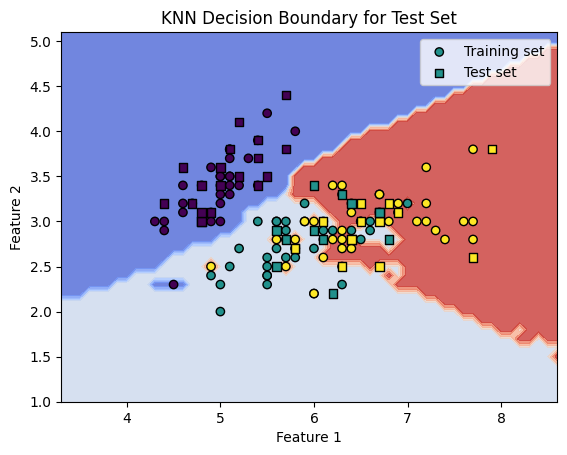

In [12]:
# Visualization of decision boundaries for the test set
visualize_knn_test_boundary(knn, X_train, y_train, X_test, y_test)